<a href="https://colab.research.google.com/github/SiddTayi/RTD_Projs/blob/main/BrainTumorDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?d1=0 


--2021-06-27 19:16:09--  https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?d1=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dtw18saps0231yn/BrainTumorData.zip [following]
--2021-06-27 19:16:09--  https://www.dropbox.com/s/raw/dtw18saps0231yn/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc929c018f3af9a1f698a8f2e7b1.dl.dropboxusercontent.com/cd/0/inline/BROUuQ3EmKrZScg-voKKhd9Z2wuaeF5yAIUG2T5dNiYvA7-emmafhkmtEe2MCTFQmHg2rCEcayMQ7jVlcHU-qte0IHGywA_spEzkdaPBHiODNxwuUm34wghep9MmmdvXBG6pj-jys_NgdTnCy1Yk3sWT/file# [following]
--2021-06-27 19:16:09--  https://uc929c018f3af9a1f698a8f2e7b1.dl.dropboxusercontent.com/cd/0/inline/BROUuQ3EmKrZScg-voKKhd9Z2wuaeF5yAIUG2T5dNiYvA7-emmafhkmtEe2MCTFQmHg

In [ ]:
!unzip /content/BrainTumorData.zip?d1=0


##IMPORT LIBS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math 
import shutil 
import glob

Count no. of images

In [ ]:
ROOT_DIR = "/content/BrainTumorData/Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
number_of_images.items()

#os.listdir(os.path.join(ROOT_DIR, dir))
# Brain Tumor , healthy

dict_items([('Healthey', 2087), ('Brain Tumor', 2513)])

##Training and Testing data Split
  + 70% Training
  + 15% Testing
  + 15% Validation

In [ ]:
# if not os.path.exists("./train"):
#   os.mkdir("./train")

#   for dir in os.listdir(ROOT_DIR):
#     os.makedirs("./train/"+dir)
    
#     for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
#                                 size = (math.floor(70/100 * number_of_images[dir])-5),
#                                 replace = False):
#       O = os.path.join(ROOT_DIR,dir,img)
#       D = os.path.join("./train",dir)
#       shutil.copy(O,D)
#       os.remove(O)
# else:
#   print("The folder exists")
      


In [ ]:
# if not os.path.exists("./train"):
#   os.mkdir("./train")

#   for dir in os.listdir(ROOT_DIR):
#     os.makedirs('./train/'+dir)

#     for img in np.random.choice(a= os.listdir(os.path.join(ROOT_DIR, dir)),
#                                 size = (math.floor(70/100 * number_of_images[dir])-5),
#                                 replace = False):
                                
    
#       O = os.path.join(ROOT_DIR,dir,img)
#       D = os.path.join('./train',dir)
#       shutil.copy(O,D)
#       os.remove(O)

# else:
#   print("The Folder Exists")

In [ ]:
def dataFolder(p,split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)

      for img in np.random.choice(a= os.listdir(os.path.join(ROOT_DIR, dir)),
                                  size = (math.floor(split * number_of_images[dir])-5),
                                  replace = False):
                                  
      
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O,D)
        os.remove(O)

  else:
    print(f"{p} Folder exists")

In [ ]:
dataFolder("train",0.70)
dataFolder("validation",0.15)
dataFolder("test",0.15)

#Model Building

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, MaxPooling2D, GlobalAvgPool2D
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
# CNN model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',input_shape=(244,244,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(rate = 0.25))

model.add(Dense(units = 1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [ ]:
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
number_of_images.items()


dict_items([('Healthey', 16), ('Brain Tumor', 17)])

## Preparing Data for Image Data Generator

In [ ]:
def preprocessingImages(path):
  """
  input : Path
  output : Preprocessed Images
  """
  image_data = ImageDataGenerator(zoom_range=0.2,
                                  shear_range=0.2,
                                  rescale = 1/255,
                                  horizontal_flip= True) #data Augmentation
  image = image_data.flow_from_directory(directory = path, target_size = (244,244), batch_size= 32, class_mode='binary')

  return image

In [ ]:
def preprocessingImages2(path):
  """
  input : Path
  output : Preprocessed Images
  """
  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (244,244), batch_size= 32, class_mode='binary')

  return image

In [ ]:
path_train = '/content/train'
train_data = preprocessingImages(path_train)

Found 3209 images belonging to 2 classes.


In [ ]:
path_test = '/content/test'
test_data = preprocessingImages2(path_test)

Found 679 images belonging to 2 classes.


In [ ]:
path_val = '/content/validation'
val_data = preprocessingImages2(path_val)

Found 679 images belonging to 2 classes.


In [ ]:
#Early stopping

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1, mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy", filepath='./bestmodel.h5', verbose=1, save_best_only= True, mode='auto')

cd = [es,mc]

#Training


In [ ]:
hs = model.fit_generator(generator=train_data, 
                         steps_per_epoch=8, 
                         epochs= 30, 
                         verbose=1, 
                         validation_data = val_data,
                         validation_steps = 16, 
                         callbacks = cd
                         )

In [ ]:
# Plotting (Graphical interpretation)
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt


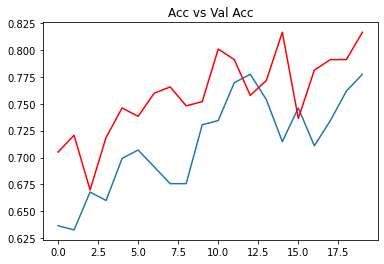

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title('Acc vs Val Acc')
plt.show()

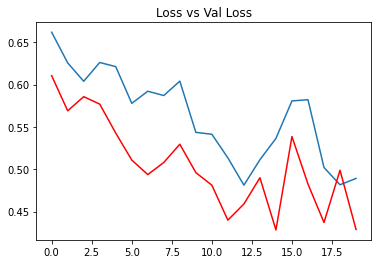

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title('Loss vs Val Loss')
plt.show()

In [ ]:
#model acc
from keras.models import load_model

model = load_model('/content/bestmodel.h5')

##model acc


In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"acc: {acc*100}%")

acc: 79.08689379692078%


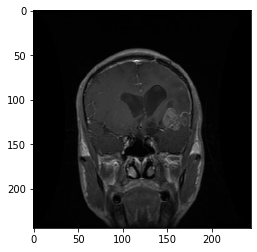

The image is having a Tumor


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
path = "/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (405).jpg"
img = load_img(path, target_size=(244,244))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)
pred = model.predict_classes(input_arr)[0][0]
pred

if pred==0:
  print("The image is having a Tumor")
else:
  print("The Scan is not having a Tumor")